In [1]:
import torch

import torchaudio

from melbanks import LogMelFilterBanks

In [2]:
autdio_path = "../../data/file_example_WAV_1MG.wav"

In [3]:
signal, sr = torchaudio.load(autdio_path)
signal = torchaudio.functional.resample(signal, sr, 16000)

In [4]:
melspec = torchaudio.transforms.MelSpectrogram(
    hop_length=160,
    n_mels=80
)(signal)
logmelbanks = LogMelFilterBanks()(signal)

assert torch.log(melspec + 1e-6).shape == logmelbanks.shape
assert torch.allclose(torch.log(melspec + 1e-6), logmelbanks)

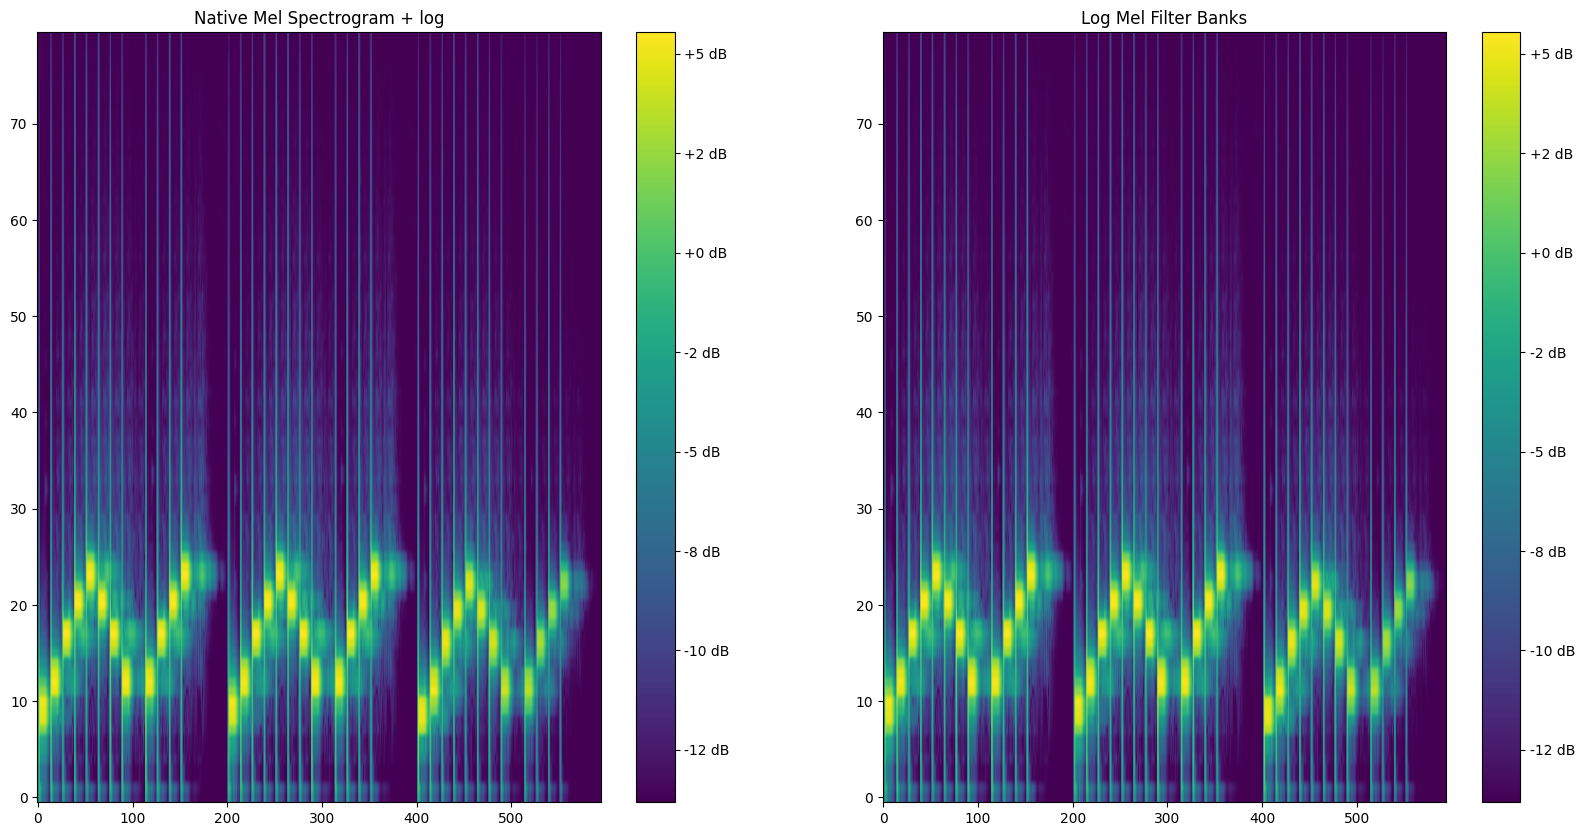

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Native Mel Spectrogram + log")
plt.imshow(torch.log(melspec[0] + 1e-6).numpy(), aspect='auto', origin='lower')
plt.colorbar(format="%+2.0f dB")
plt.subplot(1, 2, 2)
plt.title("Log Mel Filter Banks")
plt.imshow(logmelbanks[0].numpy(), aspect='auto', origin='lower')
plt.colorbar(format="%+2.0f dB")
plt.savefig("../../data/logmelbanks.png", dpi=300, bbox_inches='tight')